# Springboard Data Science Intensive Data Story: James Dolan & The Knicks

For my Data Story project, I've decided to take Fivethirtyeight's NBA Elo Ratings and examine how the Knicks have fared since James Dolan took over in 1999. The source data comes from Fivethirtyeight's GitHub page.

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import datetime as datetime
import numpy as np
import seaborn as sns

In [53]:
data = pd.read_csv(r'/Users/michaelcaruana/Desktop/springboard_dsi/nbaallelo.csv')
data['date_game'] = pd.to_datetime(data.date_game,format = '%m/%d/%Y')
data.columns.unique()

array(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'], dtype=object)

In [54]:
knicks_dolan = data[(data.date_game >= '1999-07-01') & (data.fran_id == 'Knicks')]

In [55]:
#What has Dolan done to the Knicks? 
knicks_predolan = data[(data.date_game < '1999-07-01') & (data.fran_id == 'Knicks')]
finalelo_predolan = knicks_predolan[knicks_predolan.date_game == max(knicks_predolan.date_game)]
knicks_dolan['pre_dolan_elo'] = finalelo_predolan.elo_n.iloc[0]
knicks_dolan_chart = knicks_dolan.loc[:,['date_game','elo_n','pre_dolan_elo']]

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


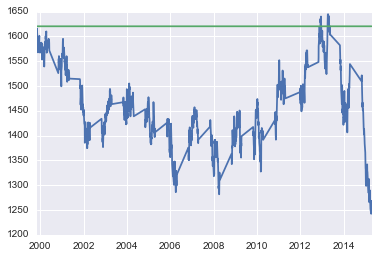

In [56]:
#Plot the Knicks following the 1998-1999 Season (end of pre-Dolan Era) versus performance during the Dolan Era
plt.plot(knicks_dolan_chart.date_game,knicks_dolan_chart.elo_n)
plt.plot(knicks_dolan_chart.date_game,knicks_dolan_chart.pre_dolan_elo)

In [57]:
knicks_better = knicks_dolan_chart[knicks_dolan_chart.elo_n > knicks_dolan_chart.pre_dolan_elo]
knicks_worse = knicks_dolan_chart[knicks_dolan_chart.elo_n < knicks_dolan_chart.pre_dolan_elo]
time_better = len(knicks_better)/len(knicks_dolan_chart)
time_worse = len(knicks_worse)/len(knicks_dolan_chart)

#### Looking at the above, we can see that the Knicks only achieved an Elo rating higher than their pre-Dolan in two stints during the 2012-2013 season. Those two stints account for 1.6% of the Dolan era. The other 98.4% of the time, the Knicks were worse than their pre-Dolan Elo.

In [58]:
nba_dolan = data[(data.date_game >= '1999-07-01')]
nba_teams = pd.DataFrame(nba_dolan.fran_id.unique()).rename(columns = {0:'fran_id'})
nba_teams.head(30)

,fran_id
0,Pelicans
1,Magic
2,Warriors
3,Mavericks
4,Suns
5,Nuggets
6,Bucks
7,Rockets
8,Thunder
9,Clippers


In [59]:
nba_dolan.shape

(41092, 23)

In [60]:
def index_elo(df1,df2):
    #start with blank dataframe to append calculated sigmas to
    indexed_elo = pd.DataFrame()
    for idx, row in df2[['fran_id']].iterrows():
        current = row['fran_id']
        temp = df1[(df1.fran_id == current)]
        temp['indexed'] = temp.elo_n/temp.elo_i.iloc[0]
        temp['indexed'] = temp['indexed'].shift(1).fillna(1)
        indexed_elo = indexed_elo.append(temp,ignore_index=False)
    return indexed_elo

In [61]:
indexed_elo = index_elo(nba_dolan,nba_teams)

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


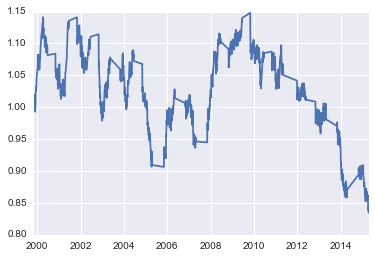

In [86]:
team = indexed_elo[indexed_elo.fran_id == 'Lakers']
plt.plot(team.date_game,team.indexed)

In [77]:
test = indexed_elo.groupby(['fran_id'])['date_game'].max().reset_index()
test_merge = pd.merge(test,indexed_elo,on=['fran_id','date_game'],how='inner')
test_merge = test_merge.sort('indexed',ascending=True)
test_merge.head(30)

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,fran_id,date_game,gameorder,game_id,lg_id,_iscopy,year_id,seasongame,is_playoffs,team_id,...,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,indexed
11,Knicks,2015-04-15,63074,201504150NYK,NBA,0,2015,82,0,NYK,...,DET,Pistons,112,1448.3408,1461.0784,H,L,0.386974,NaN,0.796980
22,Sixers,2015-04-15,63075,201504150PHI,NBA,0,2015,82,0,PHI,...,MIA,Heat,105,1451.0632,1455.8601,H,L,0.400496,NaN,0.830699
12,Lakers,2015-04-15,63069,201504150LAL,NBA,0,2015,82,0,LAL,...,SAC,Kings,122,1400.1278,1418.2802,H,L,0.501819,NaN,0.834753
13,Magic,2015-04-15,63063,201504150BRK,NBA,1,2015,82,0,ORL,...,BRK,Nets,101,1463.5762,1467.5382,A,L,0.193722,NaN,0.854714
26,Timberwolves,2015-04-15,63072,201504150MIN,NBA,0,2015,82,0,MIN,...,OKC,Thunder,138,1575.4338,1583.2285,H,L,0.236406,NaN,0.863946
19,Pistons,2015-04-15,63074,201504150NYK,NBA,1,2015,82,0,DET,...,NYK,Knicks,90,1268.4222,1255.6846,A,W,0.613026,NaN,0.922685
7,Heat,2015-04-15,63075,201504150PHI,NBA,1,2015,82,0,MIA,...,PHI,Sixers,101,1280.9860,1276.1891,A,W,0.599504,NaN,0.926873
17,Pacers,2015-04-15,63070,201504150MEM,NBA,1,2015,82,0,IND,...,MEM,Grizzlies,95,1581.7781,1587.3375,A,L,0.271633,NaN,0.934814
10,Kings,2015-04-15,63069,201504150LAL,NBA,1,2015,82,0,SAC,...,LAL,Lakers,99,1301.3918,1283.2395,A,W,0.498181,NaN,0.940343
24,Suns,2015-04-14,63062,201504140PHO,NBA,0,2015,82,0,PHO,...,LAC,Clippers,112,1698.8702,1705.4121,H,L,0.326873,NaN,0.956235


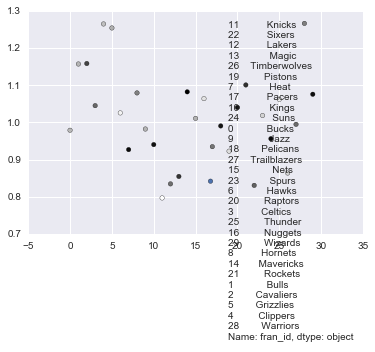

In [103]:
#This scatter plot shows that from the time Dolan took over until the end of 2014-2015 season, the Knicks have had the largest drop in Elo
plt.scatter(test_merge.index,test_merge.indexed, c=np.random.rand(30,), label = test_merge.fran_id)
plt.legend(loc='best')

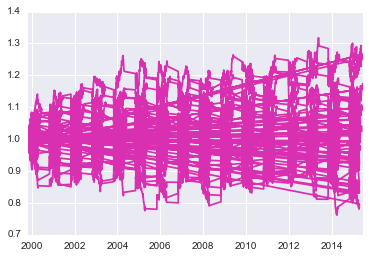

In [105]:
plt.plot(indexed_elo.date_game,indexed_elo.indexed,c = np.random.rand(3,))

In [107]:
colors = {2,63,165},{125,135,185},{190,193,212},{214,188,192},{187,119,132},{142,6,59},{74,111,227},{133,149,225},{181,187,227},{230,175,185},{224,123,145},{211,63,106},{17,198,56},{141,213,147},{198,222,199},{234,211,198},{240,185,141},{239,151,8},{15,207,192},{156,222,214},{213,234,231},{243,225,235},{246,196,225},{247,156,212}